<a href="https://colab.research.google.com/github/juniors719/dry_bean_classifier/blob/develop/dry_bean_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando o ambiente e baixando os dados

### Instala√ß√£o das bibliotecas

In [2]:
%pip install pandas matplotlib openpyxl

### Importa√ß√£o das biliotecas

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Valida√ß√£o Cruzada e M√©tricas
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Otimiza√ß√£o de Hiperpar√¢metros
from sklearn.model_selection import GridSearchCV

# Visualiza√ß√£o
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Importa√ß√£o dos dados

### Carregando o conjunto de dados a partir de um arquivo Excel

In [4]:
df = pd.read_excel("https://github.com/juniors719/dry_bean_classifier/raw/refs/heads/main/DryBeanDataset/Dry_Bean_Dataset.xlsx")

O conjunto de dados de feij√£o seco √© carregado diretamente de um arquivo Excel hospedado no GitHub usando a fun√ß√£o read_excel do pandas.

### Mostrando as 5 primeiras linhas

In [5]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

O m√©todo `head()` foi utilizado para visualizar as primeiras 5 linhas do DataFrame. Isso ajuda a obter uma vis√£o inicial dos dados, incluindo as colunas e alguns valores de amostra.

### Informa√ß√µes do dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

O m√©todo `describe()` √© utilizado para gerar estat√≠sticas descritivas, como a m√©dia, desvio padr√£o, valores m√≠nimo e m√°ximo, e os quartis das colunas num√©ricas do DataFrame.

### Estat√≠sticas descritivas

In [7]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

O m√©todo `describe()` √© utilizado para gerar estat√≠sticas descritivas, como a m√©dia, desvio padr√£o, valores m√≠nimo e m√°ximo, e os quartis das colunas num√©ricas do DataFrame.

# Visualiza√ß√£o dos Dados

### Visualiza√ß√£o da distribui√ß√£o das classes de feij√£o no conjunto de dados

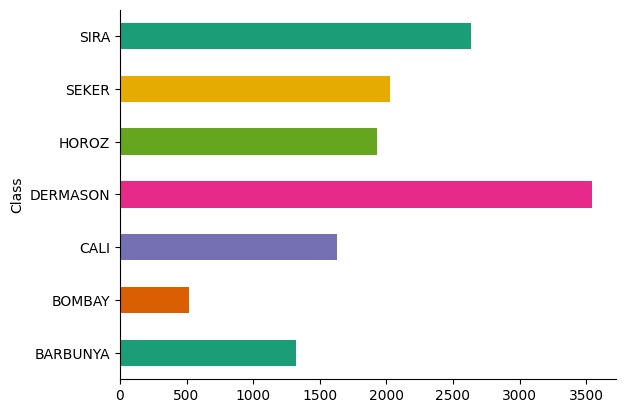

In [8]:
df.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Foi gerada uma visualiza√ß√£o da distribui√ß√£o das diferentes classes de feij√£o no conjunto de dados utilizando um gr√°fico de barras horizontais. Esse gr√°fico mostra o n√∫mero de amostras de cada classe, facilitando a an√°lise da representatividade das diferentes variedades de feij√£o presentes no dataset.

### Visualiza√ß√£o da distribui√ß√£o da feature "Area" no conjunto de dados com histograma

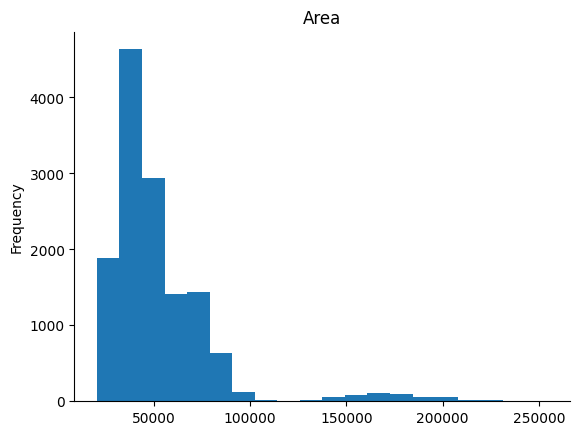

In [9]:
df['Area'].plot(kind='hist', bins=20, title='Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

A distribui√ß√£o da feature "Area" foi visualizada por meio de um histograma, utilizando 20 bins. Esse gr√°fico permite observar a frequ√™ncia das diferentes √°reas dos gr√£os de feij√£o, oferecendo insights sobre a concentra√ß√£o de valores e poss√≠veis varia√ß√µes entre os dados.

### Verificar dados ausentes

In [10]:
missing_values = df.isnull().sum()

print(missing_values)

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


A verifica√ß√£o de dados ausentes revelou que o conjunto de dados est√° completo, sem valores ausentes em nenhuma das colunas. Todos os campos, incluindo as caracter√≠sticas e a classe, est√£o totalmente preenchidos.

Foi utilizdo o m√©todo `isnull().sum()` para contar quantos valores ausentes existem em cada coluna do DataFrame. Como a sa√≠da mostra 0 para todas as colunas, significa que n√£o h√° dados faltando no conjunto.

# Divis√£o dos dados

### Defini√ß√£o de X (features) e y (target)

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

As features (vari√°veis independentes) foram atribu√≠das √† vari√°vel X, enquanto a vari√°vel-alvo (classe do gr√£o) foi atribu√≠da √† vari√°vel y. A coluna "Class", que representa o tipo de feij√£o, foi separada das demais vari√°veis num√©ricas para posterior treinamento dos modelos de classifica√ß√£o.

### Split do dataset em treino e teste (80/20) com estratifica√ß√£o

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

O conjunto de dados foi dividido em 80% para treino e 20% para teste utilizando o train_test_split. O par√¢metro stratify=y garante que a distribui√ß√£o das classes seja proporcional nos dois conjuntos, mesmo para as classes com menos representatividade. A utiliza√ß√£o de random_state=42 assegura a reprodutibilidade dos resultados.

In [13]:
print("Adicionei esses print pra gente visualizar melhor")
print("\nDistribui√ß√£o das classes no treino:")
print(y_train.value_counts(normalize=True))
print("\nDistribui√ß√£o das classes no teste:")
print(y_test.value_counts(normalize=True))

Adicionei esses print pra gente visualizar melhor

Distribui√ß√£o das classes no treino:
Class
DERMASON    0.260562
SIRA        0.193699
SEKER       0.148880
HOROZ       0.141624
CALI        0.119765
BARBUNYA    0.097079
BOMBAY      0.038391
Name: proportion, dtype: float64

Distribui√ß√£o das classes no teste:
Class
DERMASON    0.260375
SIRA        0.193537
SEKER       0.149100
HOROZ       0.141755
CALI        0.119721
BARBUNYA    0.097319
BOMBAY      0.038193
Name: proportion, dtype: float64


Note que, ao exibir a distribui√ß√£o das classes nos conjuntos de treino e teste, podemos observar que as propor√ß√µes de cada classe s√£o muito semelhantes em ambos os conjuntos. Isso confirma que a estratifica√ß√£o foi realizada corretamente.

# Pr√©-processamento dos dados

### Escalonamento de caracter√≠sticas

In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("M√©dia do treino (ap√≥s escalonamento):", X_train_scaled.mean(axis=0))
print("Desvio padr√£o do treino (ap√≥s escalonamento):", X_train_scaled.std(axis=0))

M√©dia do treino (ap√≥s escalonamento): [ 1.18771839e-16  3.49136998e-16  2.13397754e-16 -2.74741451e-16
 -5.85375490e-16 -7.64185841e-16 -9.85414705e-17 -2.77351821e-16
 -4.48983654e-16  2.85535331e-14 -1.16030950e-15 -4.33974026e-16
  5.78196973e-16 -8.06604355e-16  4.37236988e-17 -1.82660646e-14]
Desvio padr√£o do treino (ap√≥s escalonamento): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Ap√≥s o escalonamento com o StandardScaler, as m√©dias das colunas do conjunto de treino est√£o muito pr√≥ximas de zero, o que indica que o escalonamento foi bem-sucedido. O objetivo do StandardScaler √© centralizar os dados em torno de zero.

Al√©m disso, o desvio padr√£o de todas as vari√°veis √© 1, como esperado, pois o StandardScaler tamb√©m ajusta os dados para ter um desvio padr√£o de 1. Isso √© importante para garantir que as vari√°veis tenham a mesma escala, evitando que vari√°veis com maior magnitude dominem o modelo.

# Treinamento

### Definindo os modelos

In [15]:
models = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 20]
        }
    },
    "DT": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [None, 20],
            "min_samples_split": [2, 12, 20]
        }
    },
    # "OVR": {
    #     "model": OneVsRestClassifier(LogisticRegression(random_state=42, solver="saga", max_iter=3000)),
    #     "params": {
    #         "estimator__C": [0.01, 0.1, 1],
    #         "estimator__penalty": ["l2"]
    #     }
    # },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"]
        }
    }
}

In [16]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test, scaled=False):
    results = []
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for model_name, config in models.items():
        print(f"\nTreinando {model_name} (Escalonado: {scaled})...")

        grid_search = GridSearchCV(
            config["model"],
            config["params"],
            cv=kfold,
            scoring="accuracy",
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_

        cv_scores = cross_val_score(best_model, X_train, y_train, cv=kfold, scoring="accuracy", n_jobs=-1)

        y_pred = best_model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average="weighted")
        recall = recall_score(y_test, y_pred, average="weighted")
        f1 = f1_score(y_test, y_pred, average="weighted")

        results.append({
            "Modelo": model_name,
            "Melhores Par√¢metros": grid_search.best_params_,
            "Acur√°cia (Valida√ß√£o Cruzada)": cv_scores.mean(),
            "Acur√°cia (Teste)": accuracy,
            "Precis√£o": precision,
            "Recall": recall,
            "F1-Score": f1,
            "Escalonado": scaled
        })

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(4, 4))
        sns.heatmap(
            cm, annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_
        )
        plt.title(f"Matriz de Confus√£o - {model_name} (Escalonado: {scaled})")
        plt.xlabel("Predito")
        plt.ylabel("Real")
        plt.show()

    return pd.DataFrame(results)


Treinando Random Forest (Escalonado: False)...


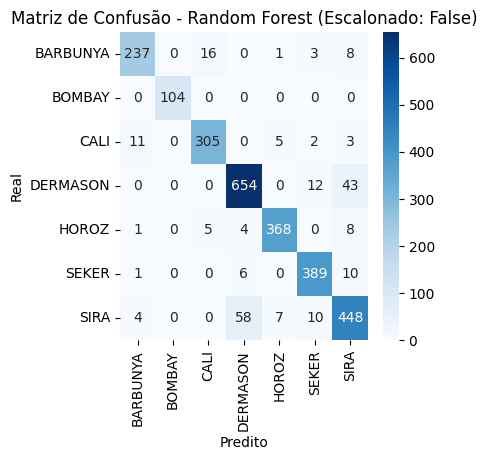


Treinando DT (Escalonado: False)...


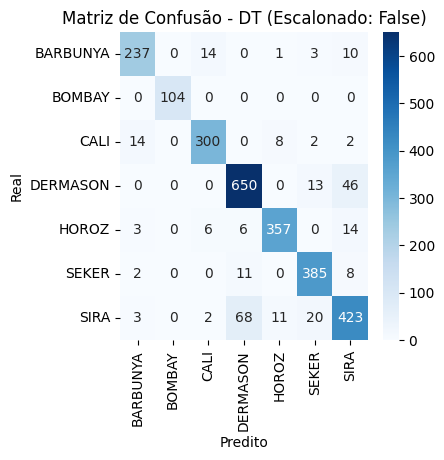


Treinando KNN (Escalonado: False)...


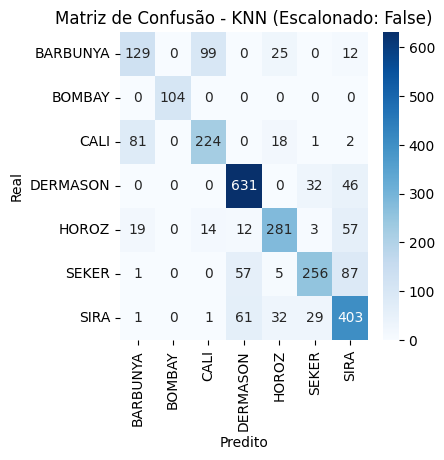


Treinando Random Forest (Escalonado: True)...


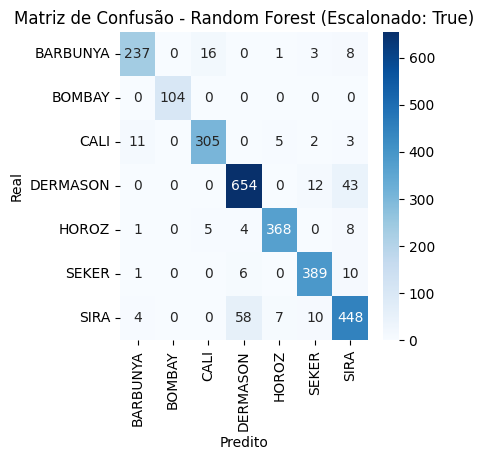


Treinando DT (Escalonado: True)...


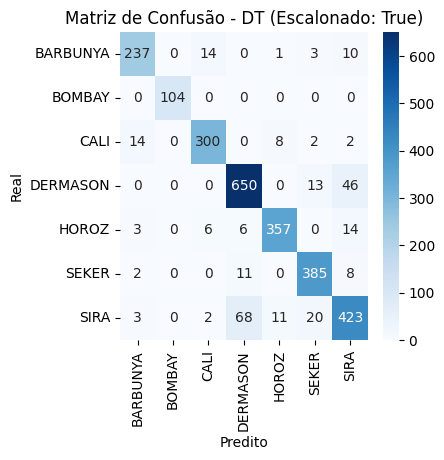


Treinando KNN (Escalonado: True)...


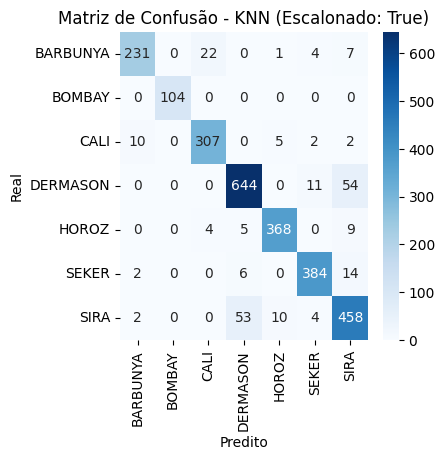

In [17]:
# Dados N√ÉO escalonados
results_no_scale = train_and_evaluate_models(X_train, X_test, y_train, y_test, scaled=False)

# Dados Escalonados
results_scaled = train_and_evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test, scaled=True)

# Combina resultados
final_results = pd.concat([results_no_scale, results_scaled], ignore_index=True)

üìä Resultados dos Modelos:


Modelo                         Melhores Par√¢metros  \
0  Random Forest    {'max_depth': None, 'n_estimators': 200}   
3  Random Forest    {'max_depth': None, 'n_estimators': 200}   
5            KNN   {'n_neighbors': 7, 'weights': 'distance'}   
1             DT  {'max_depth': 20, 'min_samples_split': 20}   
4             DT  {'max_depth': 20, 'min_samples_split': 20}   
2            KNN   {'n_neighbors': 5, 'weights': 'distance'}   

   Acur√°cia (Valida√ß√£o Cruzada)  Acur√°cia (Teste)  Precis√£o    Recall  \
0                      0.925330          0.919941  0.919940  0.919941   
3                      0.925330          0.919941  0.919940  0.919941   
5                      0.925423          0.916636  0.917321  0.916636   
1                      0.902002          0.901946  0.901747  0.901946   
4                      0.902094          0.901946  0.901747  0.901946   
2                      0.733467          0.744767  0.745520  0.744767   

   F1-Score  Escalonado  
0  0.919847       False  
3  0.919847        True  
5  0.916787        True  
1  0.901592       False  
4  0.901592        True  
2  0.742335       False

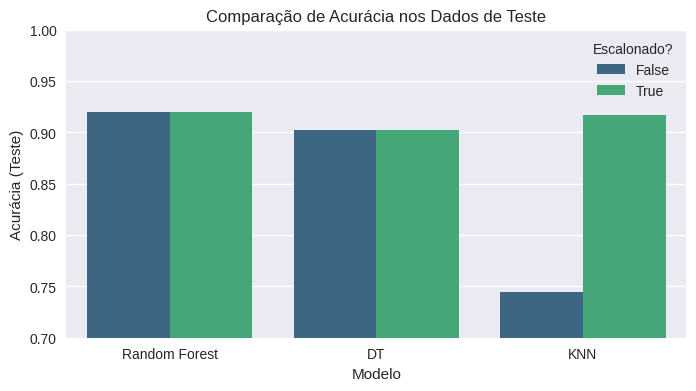

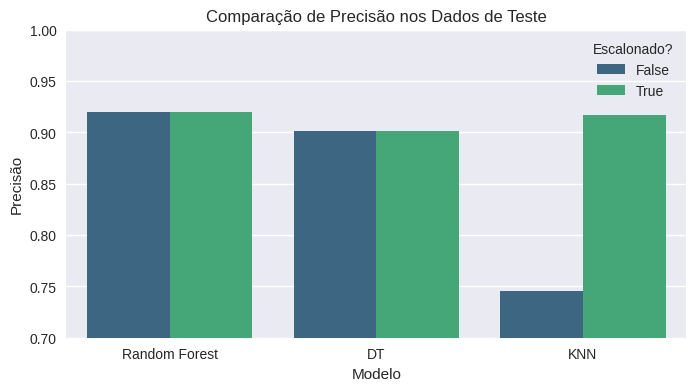

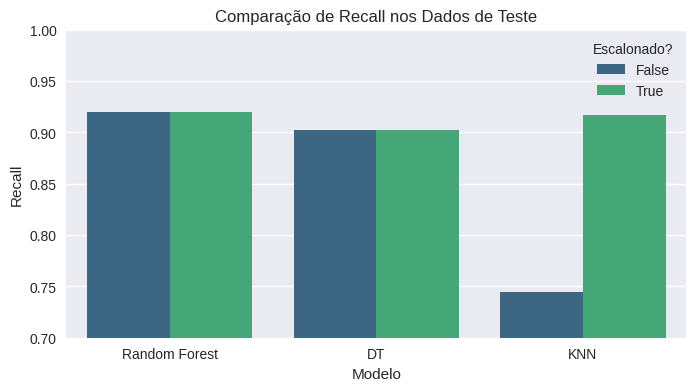

In [20]:
print("üìä Resultados dos Modelos:")
display(final_results.sort_values(by="Acur√°cia (Teste)", ascending=False))

# Configura√ß√£o do estilo
plt.style.use("seaborn-v0_8")  # Ou outro estilo dispon√≠vel

# Gr√°fico de Acur√°cia (Teste)
plt.figure(figsize=(8, 4))
sns.barplot(
    data=final_results,
    x="Modelo",
    y="Acur√°cia (Teste)",
    hue="Escalonado",
    palette="viridis"
)
plt.title("Compara√ß√£o de Acur√°cia nos Dados de Teste")
plt.ylim(0.7, 1.0)
plt.legend(title="Escalonado?")
plt.show()

# Gr√°fico de Precis√£o
plt.figure(figsize=(8, 4))
sns.barplot(
    data=final_results,
    x="Modelo",
    y="Precis√£o",
    hue="Escalonado",
    palette="viridis"
)
plt.title("Compara√ß√£o de Precis√£o nos Dados de Teste")
plt.ylim(0.7, 1.0)
plt.legend(title="Escalonado?")
plt.show()

# Gr√°fico de Recall
plt.figure(figsize=(8, 4))
sns.barplot(
    data=final_results,
    x="Modelo",
    y="Recall",
    hue="Escalonado",
    palette="viridis"
)
plt.title("Compara√ß√£o de Recall nos Dados de Teste")
plt.ylim(0.7, 1.0)
plt.legend(title="Escalonado?")
plt.show()

# Gr√°fico de F1-Score
plt.figure(figsize=(8, 4))
sns.barplot(
    data=final_results,
    x="Modelo",
    y="F1-Score",
    hue="Escalonado",
    palette="viridis"
)
plt.title("Compara√ß√£o de F1-Score nos Dados de Teste")
plt.ylim(0.7, 1.0)
plt.legend(title="Escalonado?")
plt.show()

In [21]:
import joblib
best_model = ...  # Definir o melhor modelo
joblib.dump(best_model, "melhor_modelo.pkl")

['melhor_modelo.pkl']